<a href="https://colab.research.google.com/github/viczzzz/Capstone-Fashion-Trend-Forecasting/blob/main/Capstone_Mileston2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install opencv-python
!pip install tensorflow

     |████████████████████████████████| 462 kB 24.4 MB/s 


In [15]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [16]:
from scipy import io
from scipy.io import loadmat

In [17]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [18]:
import os
os.chdir("/content/gdrive/MyDrive")
#!ls

In [19]:
os.chdir("/content/gdrive/MyDrive/ClothingAttributeDataset")
!ls

images	labels	lables	README	test  train


In [20]:
import os
directory = '/content/gdrive/MyDrive/ClothingAttributeDataset/labels'

list_of_names = [None] * 26
list_of_attributes = [None] * 26
for count, filename in enumerate(os.listdir(directory)):
    
        list_of_names[count] = filename
        S = io.loadmat(os.path.join(directory, filename))
        dict_items = S.items()
        list_of_attributes[count] = list(dict_items)[3][1].ravel()
        

In [21]:
list_of_attributes

[array([1., 1., 1., ..., 1., 1., 2.]),
 array([1., 1., 1., ..., 1., 1., 2.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 2., 2., ..., 1., 1., 1.]),
 array([2., 1., 2., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 2., 2., 1.]),
 array([ 1.,  1.,  1., ...,  1., nan,  2.]),
 array([1., 1., 2., ..., 1., 1., 1.]),
 array([nan,  1.,  2., ...,  1.,  1.,  1.]),
 array([1., 2., 1., ..., 2., 2., 2.]),
 array([2., 1., 1., ..., 1., 1., 1.]),
 array([ 2.,  2.,  2., ..., nan,  2.,  1.]),
 array([ 2., nan,  2., ...,  2.,  2.,  1.]),
 array([1., 1., 1., ..., 2., 2., 2.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([nan, nan,  1., ...,  1.,  1.,  1.]),
 array([nan,  1.,  1., ...,  1.,  1.,  1.]),
 array([3., 3., 3., ..., 3., 3., 1.]),
 array([ 1.,  2., nan, ..., 

In [22]:
list_of_names

['blue_GT.mat',
 'cyan_GT.mat',
 'green_GT.mat',
 'brown_GT.mat',
 'yellow_GT.mat',
 'purple_GT.mat',
 'red_GT.mat',
 'gray_GT.mat',
 'black_GT.mat',
 'white_GT.mat',
 'many_colors_GT.mat',
 'skin_exposure_GT.mat',
 'scarf_GT.mat',
 'pattern_solid_GT.mat',
 'gender_GT.mat',
 'necktie_GT.mat',
 'placket_GT.mat',
 'collar_GT.mat',
 'pattern_plaid_GT.mat',
 'pattern_graphics_GT.mat',
 'pattern_floral_GT.mat',
 'pattern_stripe_GT.mat',
 'pattern_spot_GT.mat',
 'sleevelength_GT.mat',
 'neckline_GT.mat',
 'category_GT.mat']

In [23]:
attributes = pd.DataFrame(list_of_attributes)

In [24]:
attributes = attributes.transpose()

In [25]:
names = [x[:-4] for x in list_of_names]
names

['blue_GT',
 'cyan_GT',
 'green_GT',
 'brown_GT',
 'yellow_GT',
 'purple_GT',
 'red_GT',
 'gray_GT',
 'black_GT',
 'white_GT',
 'many_colors_GT',
 'skin_exposure_GT',
 'scarf_GT',
 'pattern_solid_GT',
 'gender_GT',
 'necktie_GT',
 'placket_GT',
 'collar_GT',
 'pattern_plaid_GT',
 'pattern_graphics_GT',
 'pattern_floral_GT',
 'pattern_stripe_GT',
 'pattern_spot_GT',
 'sleevelength_GT',
 'neckline_GT',
 'category_GT']

In [26]:
attributes.columns = names

In [27]:
attributes

,blue_GT,cyan_GT,green_GT,brown_GT,yellow_GT,purple_GT,red_GT,gray_GT,black_GT,white_GT,many_colors_GT,skin_exposure_GT,scarf_GT,pattern_solid_GT,gender_GT,necktie_GT,placket_GT,collar_GT,pattern_plaid_GT,pattern_graphics_GT,pattern_floral_GT,pattern_stripe_GT,pattern_spot_GT,sleevelength_GT,neckline_GT,category_GT
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,3.0,1.0,5.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,1.0,1.0,1.0,NaN,1.0,3.0,2.0,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,NaN,4.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,NaN,5.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,1.0
1852,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,7.0
1853,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,7.0
1854,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0


In [30]:
#creates a dataset of images --- WORKS

import tensorflow as tf
import os
#
#os.chdir('/content/gdrive/MyDrive/ClothingAttributeDatase/images')

files = tf.data.Dataset.list_files('*jpg')
path = '/content/gdrive/MyDrive/ClothingAttributeDataset/images'
def load_images(path):
    image = tf.io.read_file(path)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32) # optional
    image = tf.image.resize(image, (224, 224))              # optional
    return image 

ds = files.map(load_images).batch(1)

next(iter(ds)).shape

InvalidArgumentError: ignored

In [31]:
os.chdir('/content/gdrive/MyDrive/ClothingAttributeDatase/images')

FileNotFoundError: ignored

In [26]:
type(ds)


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [29]:
import os

import numpy as np

import shutil

rootdir= '/content/gdrive/MyDrive/ClothingAttributeDataset/lables' #path of the original folder

classes = ['blue_GT.mat','cyan_GT.mat','green_GT.mat','brown_GT.mat','yellow_GT.mat','purple_GT.mat','red_GT.mat','gray_GT.mat','black_GT.mat','white_GT.mat','many_colors_GT.mat','skin_exposure_GT.mat','scarf_GT.mat','pattern_solid_GT.mat','gender_GT.mat','necktie_GT.mat','placket_GT.mat','collar_GT.mat','pattern_plaid_GT.mat','pattern_graphics_GT.mat','pattern_floral_GT.mat','pattern_stripe_GT.mat','pattern_spot_GT.mat','sleevelength_GT.mat','neckline_GT.mat','category_GT.mat']



In [11]:
import os
from PIL import Image, ImageDraw
path = '/content/gdrive/MyDrive/ClothingAttributeDataset'
for f in os.listdir(path):
    fpath = os.path.join(path, f)
    print (f)

os.listdir(path)

FileNotFoundError: ignored

In [30]:
os.makedirs(rootdir +'/train/' + i)

os.makedirs(rootdir +'/test/' + i)

source = rootdir + '/' + i

allFileNames = os.listdir(source)

np.random.shuffle(allFileNames)

test_ratio = 0.25

train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

for name in train_FileNames:
  shutil.copy(name, rootdir +'/train/' + i)

for name in test_FileNames:
  shutil.copy(name, rootdir +'/test/' + i)

FileNotFoundError: ignored

000001.jpg  000311.jpg	000621.jpg  000931.jpg	001241.jpg  001551.jpg
000002.jpg  000312.jpg	000622.jpg  000932.jpg	001242.jpg  001552.jpg
000003.jpg  000313.jpg	000623.jpg  000933.jpg	001243.jpg  001553.jpg
000004.jpg  000314.jpg	000624.jpg  000934.jpg	001244.jpg  001554.jpg
000005.jpg  000315.jpg	000625.jpg  000935.jpg	001245.jpg  001555.jpg
000006.jpg  000316.jpg	000626.jpg  000936.jpg	001246.jpg  001556.jpg
000007.jpg  000317.jpg	000627.jpg  000937.jpg	001247.jpg  001557.jpg
000008.jpg  000318.jpg	000628.jpg  000938.jpg	001248.jpg  001558.jpg
000009.jpg  000319.jpg	000629.jpg  000939.jpg	001249.jpg  001559.jpg
000010.jpg  000320.jpg	000630.jpg  000940.jpg	001250.jpg  001560.jpg
000011.jpg  000321.jpg	000631.jpg  000941.jpg	001251.jpg  001561.jpg
000012.jpg  000322.jpg	000632.jpg  000942.jpg	001252.jpg  001562.jpg
000013.jpg  000323.jpg	000633.jpg  000943.jpg	001253.jpg  001563.jpg
000014.jpg  000324.jpg	000634.jpg  000944.jpg	001254.jpg  001564.jpg
000015.jpg  000325.jpg	000635.jpg 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
lables = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


def get_images_and_labels(input_path):
    label_words = []

    # Iterate through the input path and append files
    for root, dirs, files in os.walk(input_path):
        for filename in (x for x in files if x.endswith('.jpg')):
            filepath = os.path.join(root, filename)
            label_words.append(filepath.split('/')[-2]) 
            
    # Initialize variables
    images = []
    le = LabelEncoder()
    le.encode_labels(label_words)
    labels = []

    # Parse the input directory
    for root, dirs, files in os.walk(input_path):
        for filename in (x for x in files if x.endswith('.jpg')):
            filepath = os.path.join(root, filename)

            # Read the image in grayscale format
            image = cv2.imread(filepath, 0) 

            # Extract the label
            name = filepath.split('/')[-2]
                
            # Perform face detection
            faces = faceCascade.detectMultiScale(image, 1.1, 2, minSize=(100,100))

            # Iterate through face rectangles
            for (x, y, w, h) in faces:
                images.append(image[y:y+h, x:x+w])
                labels.append(le.word_to_num(name))

    return images, labels, le 

In [32]:
#path = '/content/gdrive/MyDrive/ClothingAttributeDatase'
get_images_and_labels('/content/gdrive/MyDrive/ClothingAttributeDatase')

AttributeError: ignored

In [42]:
from PIL import Image
#os.getcwd()
#os.chdir('/content/gdrive/MyDrive/ClothingAttributeDataset/images')
image = Image.open('000133.jpg')

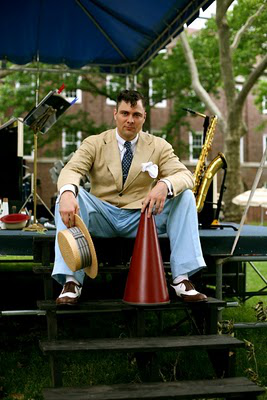

In [43]:
image

In [16]:
import os 
os.getcwd()
os.chdir('/content/gdrive/MyDrive/ClothingAttributeDataset')
!ls

images	labels	README


In [17]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt


Categories=['blue_GT.mat','cyan_GT.mat','green_GT.mat','brown_GT.mat','yellow_GT.mat','purple_GT.mat','red_GT.mat','gray_GT.mat','black_GT.mat','white_GT.mat','many_colors_GT.mat','skin_exposure_GT.mat','scarf_GT.mat','pattern_solid_GT.mat','gender_GT.mat','necktie_GT.mat','placket_GT.mat','collar_GT.mat','pattern_plaid_GT.mat','pattern_graphics_GT.mat','pattern_floral_GT.mat','pattern_stripe_GT.mat','pattern_spot_GT.mat','sleevelength_GT.mat','neckline_GT.mat','category_GT.mat']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/gdrive/MyDrive/ClothingAttributeDataset/labels' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path= os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : blue_GT.mat


NotADirectoryError: ignored

NameError: ignored

In [ ]:
dataset_list = list(ds.as_numpy_iterator())
for each_file in dataset_list:
    
    file_name=each_file.decode('utf-8') # this will contain the abs path /user/me/so/file_1.png
    try:
        idx=re.findall("(\d+).*.jpg", file_name)[0] # changed for my case
    except :
        print("Exception==>")
    print(f"File:{file_name},idx:{idx}")